In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss


import lightgbm as lgb
from xgboost import XGBClassifier
from scipy.stats import randint
from random import uniform

from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', None)


ModuleNotFoundError: No module named 'xgboost'

In [17]:
df_raw = pd.read_csv('industrial_production_line.csv.zip')
df_raw.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,state
0,223.994240,13.0,11.0,36.319020,0.0,1.0,24.0,-33.695406,8.0,0.0,-32.156231,NaN,123.824940,-102.358045,16.0,-8.069126,15.0,6.0,-47.496917,8.566330,2.0,3.0,1.0,4.0,-11.520858,17.0,13.0,40.838152,3.0,1.0,3.0,4.0,3.341542,148.183979,-50.152997,3.0,3.778781,-67.317461,-9.813237,NaN,-9.440655,1.540716,46.629952,1.0,12.0,43.493722,0.0,3.0,11.336102,NaN,15.0,5.624404,NaN,NaN,0.537756,34.583123,31.429398,-22.408355,0
1,-128.402454,13.0,12.0,31.186721,0.0,3.0,24.0,NaN,NaN,0.0,NaN,7.791696,36.313069,-113.175931,19.0,-8.773747,17.0,1.0,0.947569,-9.159158,2.0,NaN,2.0,2.0,-15.760671,15.0,13.0,35.203397,4.0,0.0,5.0,4.0,12.856012,38.686936,-36.407041,7.0,826.405382,22.093144,NaN,-15.846483,-41.450224,1.042777,32.074913,0.0,10.0,43.045999,1.0,2.0,25.225367,3.0,12.0,47.728281,-7.124257,20.438850,-45.894431,27.884695,42.941831,-16.814068,0
2,40.646392,10.0,12.0,-1.312408,0.0,3.0,NaN,-54.614655,9.0,0.0,-8.010136,79.039537,20.468872,-27.836559,17.0,1.480716,16.0,4.0,-39.637452,-5.912972,NaN,6.0,1.0,6.0,0.641529,12.0,16.0,41.163167,4.0,0.0,NaN,4.0,3.769214,91.754443,-69.352998,2.0,1.376691,43.066825,-9.973754,3.403067,-92.001715,0.289172,19.105350,2.0,NaN,-63.034483,0.0,2.0,16.138007,2.0,NaN,-27.692600,-19.569973,NaN,-29.359840,15.570394,35.882544,-29.249974,0
3,40.163078,12.0,11.0,-16.398128,1.0,3.0,23.0,-57.604208,7.0,1.0,44.791046,-20.022530,66.619467,-104.388960,17.0,-22.820859,16.0,2.0,1.312523,-9.841109,4.0,NaN,NaN,7.0,-25.117300,15.0,10.0,41.368751,6.0,0.0,5.0,2.0,15.901708,125.947864,-61.924833,6.0,1.887246,-23.092216,-2.489192,-31.694578,NaN,3.166642,41.164860,1.0,12.0,-53.885739,0.0,2.0,14.383115,4.0,18.0,2.152467,-89.313401,77.222785,-13.859551,24.109083,40.013360,-31.723771,0
4,-15.144351,12.0,13.0,4.344052,0.0,NaN,24.0,-82.281875,7.0,0.0,24.502299,-87.728080,18.030435,-114.047178,11.0,-19.911423,15.0,2.0,NaN,-11.918447,4.0,NaN,3.0,NaN,-48.673102,15.0,14.0,47.009142,7.0,NaN,4.0,2.0,20.408875,112.935019,-71.457375,2.0,1.648001,42.074210,-7.970682,NaN,47.291774,2.762923,29.578806,1.0,10.0,NaN,NaN,1.0,20.906314,2.0,13.0,27.955808,NaN,-73.216648,-1.472608,47.017526,35.101979,-44.032822,1


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793930 entries, 0 to 793929
Data columns (total 59 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1       723924 non-null  float64
 1   2       713610 non-null  float64
 2   3       733605 non-null  float64
 3   4       730559 non-null  float64
 4   5       722861 non-null  float64
 5   6       702655 non-null  float64
 6   7       698312 non-null  float64
 7   8       702606 non-null  float64
 8   9       741044 non-null  float64
 9   10      700594 non-null  float64
 10  11      698753 non-null  float64
 11  12      725175 non-null  float64
 12  13      707345 non-null  float64
 13  14      725769 non-null  float64
 14  15      692502 non-null  float64
 15  16      725130 non-null  float64
 16  17      709458 non-null  float64
 17  18      712676 non-null  float64
 18  19      756478 non-null  float64
 19  20      731765 non-null  float64
 20  21      709194 non-null  float64
 21  22      71

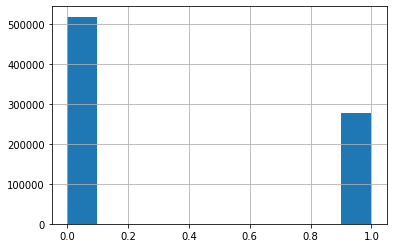

In [19]:
df_raw['state'].hist()
None

In [20]:
pd.value_counts(df_raw['state'].values.flatten())

0    517870
1    276060
dtype: int64

In [21]:
df_raw.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,state
count,723924.000000,713610.000000,733605.000000,730559.000000,722861.000000,702655.000000,698312.000000,702606.000000,741044.000000,700594.000000,698753.000000,725175.000000,707345.000000,725769.000000,692502.000000,725130.000000,709458.000000,712676.000000,756478.000000,731765.000000,709194.000000,718047.000000,677910.000000,726218.000000,713875.000000,726392.000000,699161.000000,716341.000000,694361.000000,724789.000000,730347.000000,724348.000000,719493.000000,719810.000000,706529.000000,718982.000000,733744.000000,720535.000000,716504.000000,693702.000000,734655.000000,745156.000000,723415.000000,700720.000000,711152.000000,723796.000000,717765.000000,712591.00000,709159.000000,738273.000000,704481.000000,744110.000000,717950.000000,716896.000000,706294.000000,716985.000000,736814.000000,693537.000000,793930.000000
mean,11.037868,12.329855,11.343881,25.405706,0.313625,2.180567,23.222491,-46.307077,7.901033,0.269039,18.871745,-0.035533,34.225983,-75.821675,17.016569,-10.154463,16.487713,3.262094,-12.338737,-0.463677,3.996162,4.528400,1.943085,5.240859,-4.215925,13.804922,12.943721,51.502656,3.087403,0.481203,3.702680,3.679960,12.453523,94.021525,-40.158823,3.568587,12.859776,58.132546,-6.129936,-16.374851,-16.139908,1.005210,33.457975,0.873611,10.854657,-22.286576,0.180761,4.15212,20.599071,2.982095,14.680731,24.029175,-19.323586,16.458480,-25.784714,26.166355,38.319594,-37.009837,0.347713
std,100.002365,0.796686,1.662416,20.645609,0.537005,0.770939,0.867548,19.879110,1.286757,0.443461,49.608470,57.767729,48.851917,36.284310,1.594333,7.027208,1.701773,1.563893,47.756311,16.881450,2.001291,1.680026,0.827215,1.903990,30.472735,2.067096,2.376394,8.741932,1.593037,0.658354,0.981275,1.475901,9.484099,33.006369,26.882497,1.661995,667.911800,47.002556,14.926715,18.119829,49.943354,2.999252,9.097965,0.787132,1.018541,35.151962,0.384820,1.68046,6.409905,1.097445,2.301637,29.142826,47.659392,45.132834,23.560848,8.508394,5.998657,15.239898,0.476245
min,-480.088690,7.000000,3.000000,-72.310070,0.000000,0.000000,17.000000,-133.009236,1.000000,0.000000,-209.150651,-99.999893,-189.175571,-249.445847,8.000000,-42.982325,7.000000,0.000000,-269.369596,-83.560468,0.000000,0.000000,0.000000,0.000000,-146.801871,3.000000,2.000000,8.707719,0.000000,0.000000,0.000000,0.000000,-33.598865,-72.840032,-161.933115,0.000000,0.001055,-182.790369,-77.903990,-107.536168,-242.543540,-13.849135,-9.012487,0.000000,4.000000,-201.520935,0.000000,0.00000,-11.358178,0.000000,4.000000,-115.421307,-246.217734,-197.419313,-136.146509,-14.899675,9.648201,-109.941727,0.000000
25%,-56.335582,12.000000,10.000000,11.480702,0.000000,2.000000,23.000000,-59.747051,7.000000,0.000000,-14.660914,-50.128700,1.314379,-100.339481,16.000000,-14.896755,15.000000,2.000000,-44.563198,-11.867222,3.000000,3.000000,1.000000,4.000000,-24.771825,12.000000,11.000000,45.601337,2.000000,0.000000,3.000000,3.000000,6.066862,71.736451,-58.322134,2.000000,0.539372,26.529859,-16.214688,-28.615805,-49.849081,-1.015704,27.320244,0.000000,10.000000,-46.078772,0.000000,3.00000,16.284560,2.000000,13.000000,4.372526,-51.503078,-13.960795,-41.728167,20.433931,34.260349,-47.305636,0.000000
50%,11.053425,13.000000,11.000000,25.416896,0.000000,2.000000,23.000000,-46.305021,8.000000,0.000000,18.794709,-0.071454,34.161967,-75.812446,17.000000,-10.152068,17.000000,3.000000,-12.290595,-0.454296,4.000000,4.000000,2.000000,5.000000,-4.213739,14.000000,13.000000,51.498418,3.000000,0.000000,4.000000,4.000000,12.444387,94.080006,-40.140239,3.000000,1.251573,58.110563,-6.138048,-16.386079,-16.151698,1.012692,33.467233,1.000000,11.000000,-22.263424,0.000000,4.00000,20.608388,3.000000,15.000000,24.049562,-19.341525,16.464838,-25.783561,26.160030,38.318131,-36.986701,0.000000
75%,78.373272,13.000000,13.000000,39.351731,1.000000,3.000000,24.000000,-3

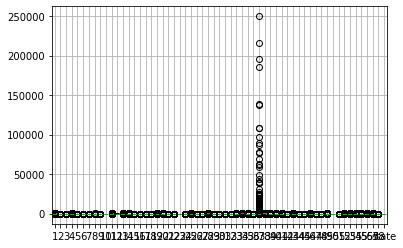

In [22]:
df_raw.boxplot()
None

In [23]:
df_raw.isna().sum()

1         70006
2         80320
3         60325
4         63371
5         71069
6         91275
7         95618
8         91324
9         52886
10        93336
11        95177
12        68755
13        86585
14        68161
15       101428
16        68800
17        84472
18        81254
19        37452
20        62165
21        84736
22        75883
23       116020
24        67712
25        80055
26        67538
27        94769
28        77589
29        99569
30        69141
31        63583
32        69582
33        74437
34        74120
35        87401
36        74948
37        60186
38        73395
39        77426
40       100228
41        59275
42        48774
43        70515
44        93210
45        82778
46        70134
47        76165
48        81339
49        84771
50        55657
51        89449
52        49820
53        75980
54        77034
55        87636
56        76945
57        57116
58       100393
state         0
dtype: int64

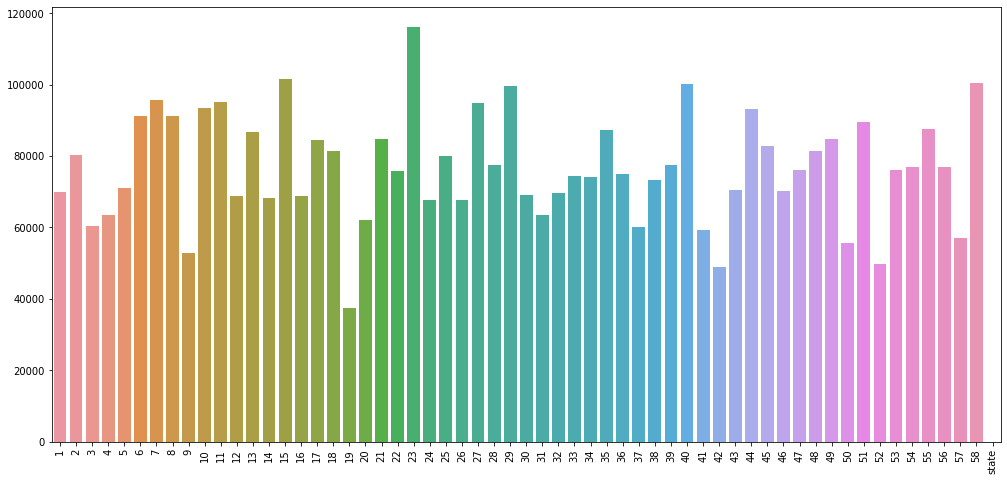

In [24]:
f, ax = plt.subplots(figsize=(17, 8))
plt.xticks(rotation='90')
sns.barplot(x = df_raw.isna().sum().index, y= df_raw.isna().sum())


## Filling NAs with mode

In [25]:
for col in df_raw.columns:
    df_raw[col] = df_raw[col].fillna(df_raw[col].mode()[0])
df_raw.isna().sum()

1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
state    0
dtype: int64

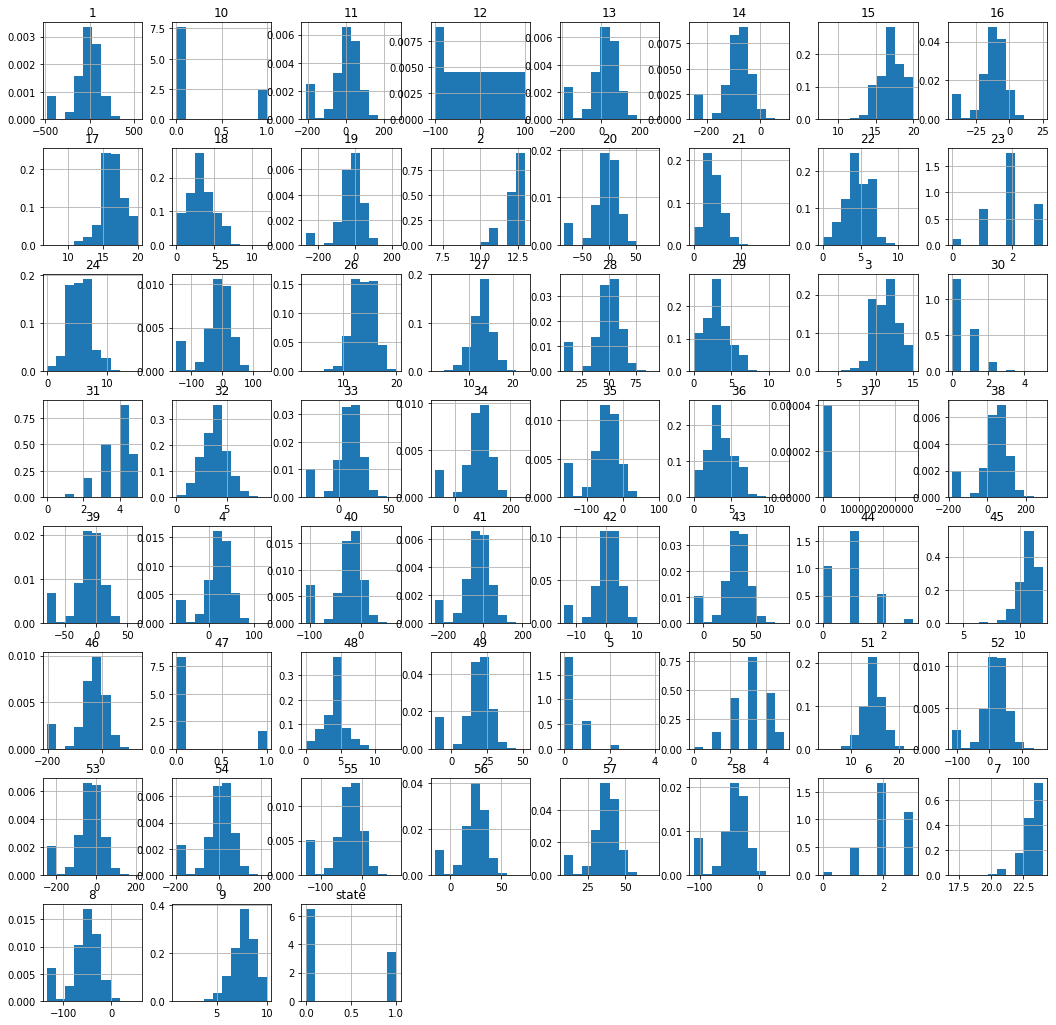

In [26]:
hs1 = df_raw.hist(figsize=(18,18), density=True)
plt.show()

In [28]:
len(df_raw[df_raw['state'] == 0]), len(df_raw[df_raw['state'] == 1])


(517870, 276060)

In [32]:
#take sample to work
df_raw1= df_raw.sample(n=80000, random_state=42)

In [33]:
X = df_raw1.drop('state', 1)
y = df_raw1['state']     

In [35]:
ns=NearMiss()
X_ns,y_ns=ns.fit_sample(X,y)
X_ns.shape

(55090, 58)

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X_ns,y_ns, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(44072, 58)
(11018, 58)
(44072,)
(11018,)


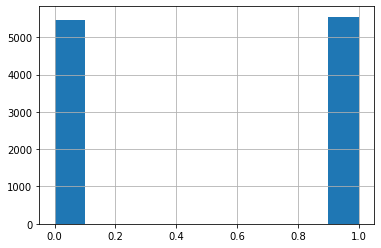

In [46]:
y_test.hist()
None

In [47]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [48]:
classifier = RandomForestClassifier(class_weight='balanced',n_jobs=1)
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)

In [51]:
importance = pd.Series(classifier.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False)

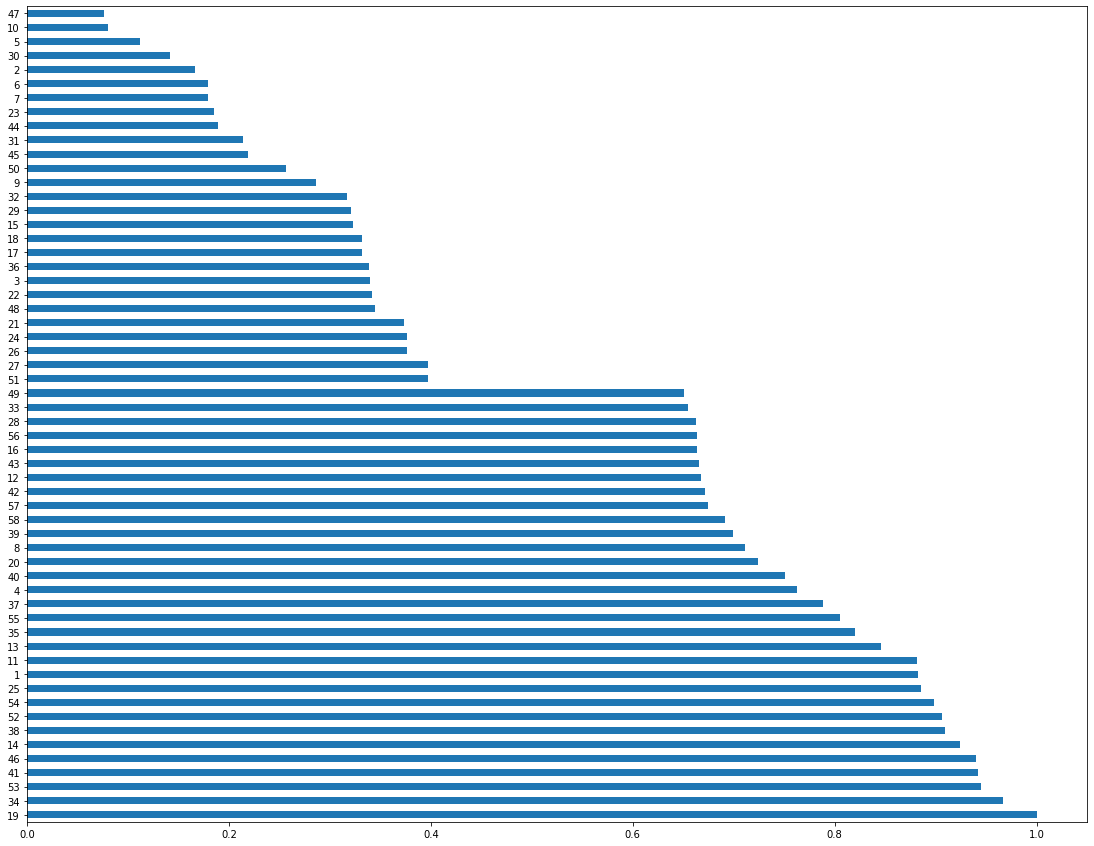

In [52]:
importance.plot.barh(figsize=(19,15))

In [59]:
cols = importance.index[30:]
cols

Index(['49', '51', '27', '26', '24', '21', '48', '22', '3', '36', '17', '18',
       '15', '29', '32', '9', '50', '45', '31', '44', '23', '7', '6', '2',
       '30', '5', '10', '47'],
      dtype='object')

In [60]:
X_train_scaled = X_train_scaled[cols]
X_test_scaled = X_test_scaled[cols]

In [65]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

AttributeError: module 'lightgbm' has no attribute 'LGBMClassifier'

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

In [ ]:
! cd ~/LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && sudo make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

In [62]:
xgb = XGBClassifier(max_depth=2,n_estimators=10,random_state=0, eval_metric='error')
model = xgb.fit(X_train_scaled, y_train)
prediction = xgb.predict(X_test_scaled)

NameError: name 'XGBClassifier' is not defined

In [63]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

NameError: name 'prediction' is not defined

In [ ]:
xgb = XGBClassifier(max_depth=2,n_estimators=10,random_state=0, eval_metric='error')
model = xgb.fit(X_train_scaled, y_train)
prediction = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))


In [ ]:
param_dist = {"max_depth": randint(1, 12),
              "eta": [uniform(0.1, 0.5)],
              "gamma": randint(0, 10),
              "n_estimators": randint(1, 100)}
tree = XGBClassifier(random_state=0,eval_metric='error')
tree_cv = RandomizedSearchCV(tree, param_dist, cv=3)
tree_cv.fit(X_train_scaled,y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
param = {"max_depth": randint(1, 12),
              "eta": [uniform(0.1, 0.5)],
              "gamma": randint(0, 10),
       'tree_method': 'gpu_hist', 'gpu_id':'0'}

model = XGBClassifier(**param)
tree_cv = RandomizedSearchCV(model, param, cv=3)
tree_cv.fit(X_train_scaled,y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [66]:
MAX_TREE_DEPTH = 8
TREE_METHOD = 'gpu_hist'
ITERATIONS = 1000
SUBSAMPLE = 0.6
REGULARIZATION = 0.1
GAMMA = 0.3
POS_WEIGHT = 1
EARLY_STOP = 10
params = {'tree_method': TREE_METHOD, 'max_depth': MAX_TREE_DEPTH, 'alpha': REGULARIZATION,
          'gamma': GAMMA, 'subsample': SUBSAMPLE, 'scale_pos_weight': POS_WEIGHT, 'learning_rate': 0.05, 
          'silent': 1, 'objective':'binary:logistic', 'eval_metric': 'auc',
          'n_gpus': 1}
model = XGBClassifier(**params)

model.fit(X_train_scaled, y_train)

#xgb = XGBClassifier(random_state=0,eval_metric='error')
#model = xgb.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)

NameError: name 'XGBClassifier' is not defined